In [ ]:
!pip install -U -qqq matplotlib
!pip install -qqq keras_ocr

In [ ]:
import os
import string
import matplotlib.pyplot as plt
import keras_ocr

In [ ]:
recognizer_weight_path = "/content/drive/Shareddrives/วิสัยทัศน์สมองกล/keras_ocr/checkpoints/version_2/recognizer.h5"

alphabet = string.ascii_letters + '!"\'(),-.:;?[]'
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))
recognizer = keras_ocr.recognition.Recognizer(alphabet=recognizer_alphabet)
recognizer.model.load_weights(recognizer_weight_path)

pipeline = keras_ocr.pipeline.Pipeline(recognizer=recognizer)

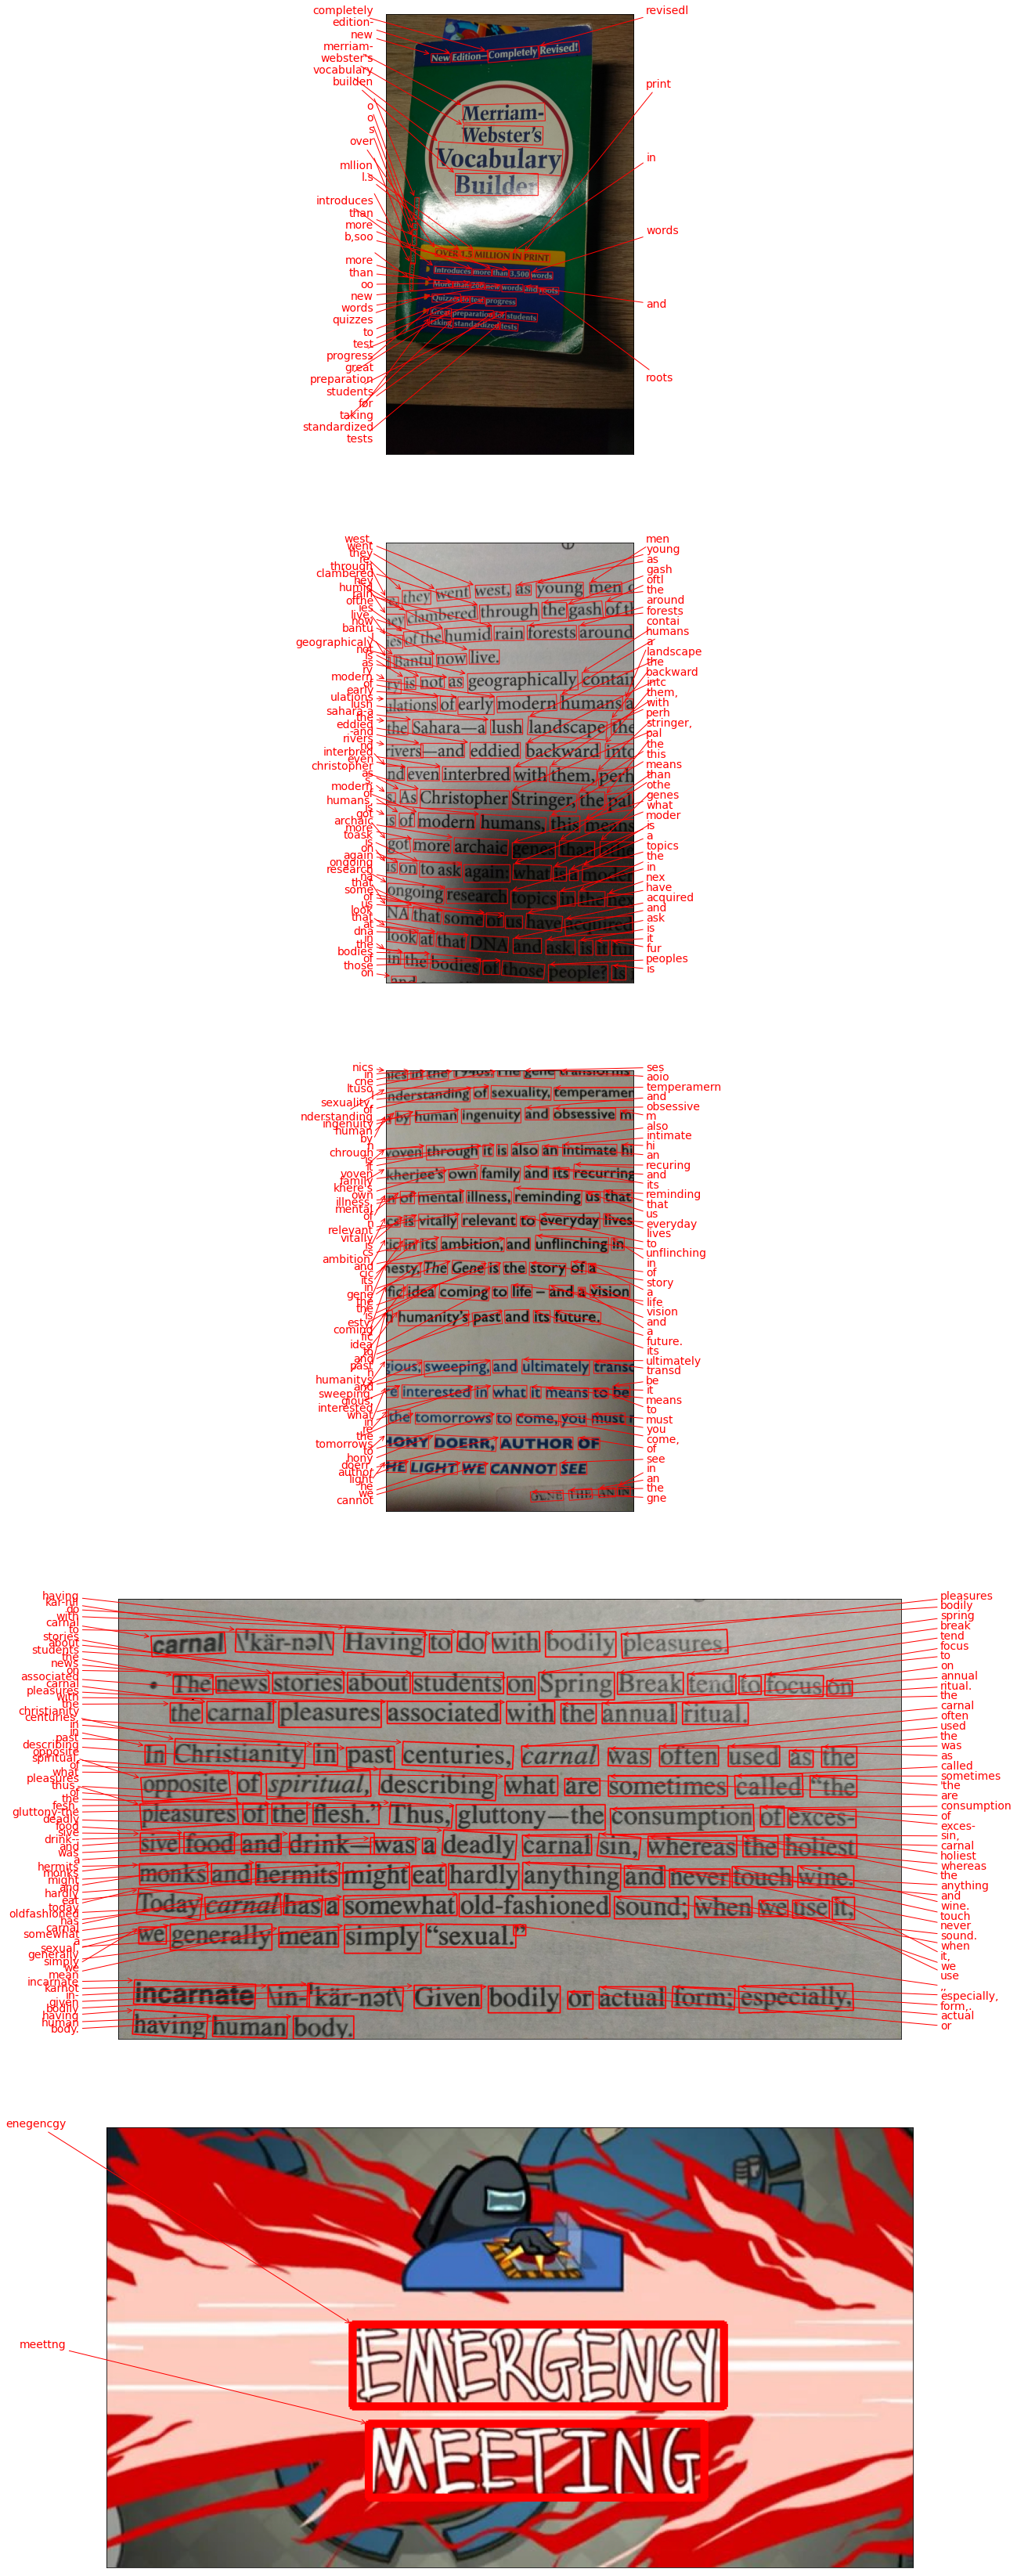

In [ ]:
# Get a set of three example images
img_base_path = '/content/drive/Shareddrives/วิสัยทัศน์สมองกล/test_images'
images = [
    keras_ocr.tools.read(os.path.join(img_base_path, filename)) for filename in os.listdir(img_base_path)
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 60))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)